### カリキュラム - 【AIコース】Feature Scaling

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
data = np.concatenate((iris.data, iris.target.reshape(-1,1)), axis = 1)
df =   pd.DataFrame(data)
cols = iris.feature_names
cols.append("type")
df.columns = cols
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


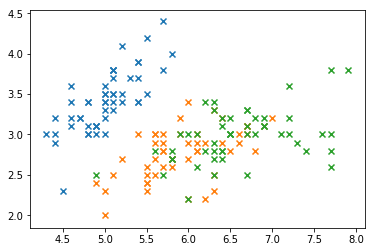

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x1 = iris.data[:,0].reshape(-1,1)
x2 = iris.data[:,1].reshape(-1,1)
y =  iris.target
X =  np.concatenate((x1,x2), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

plt.scatter(x1[y == 0], x2[y == 0], marker = "x")
plt.scatter(x1[y == 1], x2[y == 1], marker = "x")
plt.scatter(x1[y == 2], x2[y == 2], marker = "x")
plt.show()

In [6]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
# 注意
# 訓練用のデータのみの平均、標準偏差を用いて標準化する
X_train_norm = mmsc.fit_transform(X_train)
# テストデータも正規化
X_test_norm =  mmsc.transform(X_test)

print(X_train_norm.max())
print(X_train_norm.min())
# test用はtrainを基準に標準化してるので、多少0,1からずれる
print(X_test_norm.max())
print(X_test_norm.min())

1.0
0.0
1.09090909091
0.0277777777778


In [8]:
# 標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# 注意
# 訓練用のデータのみの平均、標準偏差を用いて標準化する
X_train_std = stdsc.fit_transform(X_train)
# テストデータも標準化
X_test_std =  stdsc.transform(X_test)

print(X_train_std.mean())
print(X_train_std.std())
# test用はtrainを基準に標準化してるので、多少0,1からずれる
print(X_test_std.mean())
print(X_test_std.std())

8.50113630284e-16
1.0
-0.0871456128896
1.12383259892


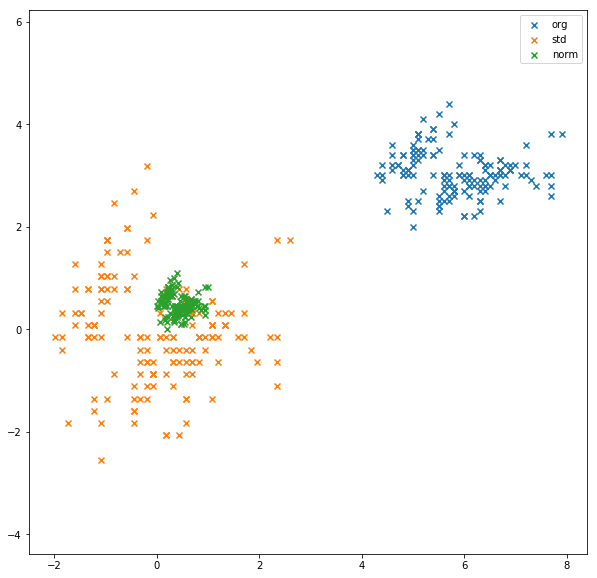

In [10]:
# plot
plt.figure(figsize = (10, 10))
plt.axis("equal")
plt.scatter(X[:,0], X[:,1], marker = "x", label = "org")
X_norm = mmsc.transform(X)
X_std =  stdsc.transform(X)
plt.scatter(X_std[:,0], X_std[:,1], marker = "x", label = "std")
plt.scatter(X_norm[:,0], X_norm[:,1], marker = "x", label = "norm")
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
lr = LogisticRegression()
lr_std = LogisticRegression()
lr.fit(X_train, y_train)
lr_std.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
def decision(X, y, model, scale):
    colors = "red,blue,lightgreen".split(",")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min(), X[:,0].max()
    x2_min, x2_max = X[:,1].min(), X[:,1].max()
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02*scale),
                           np.arange(x2_min, x2_max, 0.02*scale))
    z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.figure(figsize = (15, 10))
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8,
                    c =     cmap(idx),
                    label = cl)

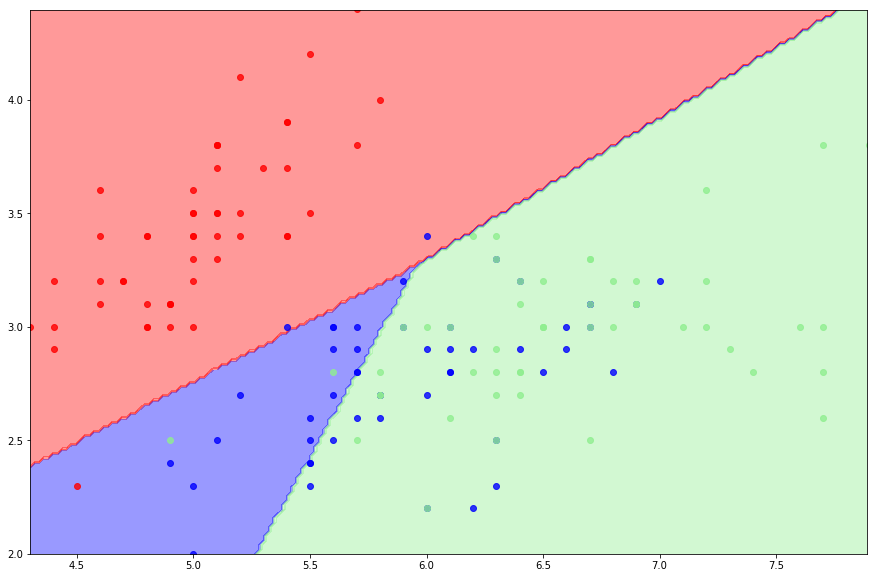

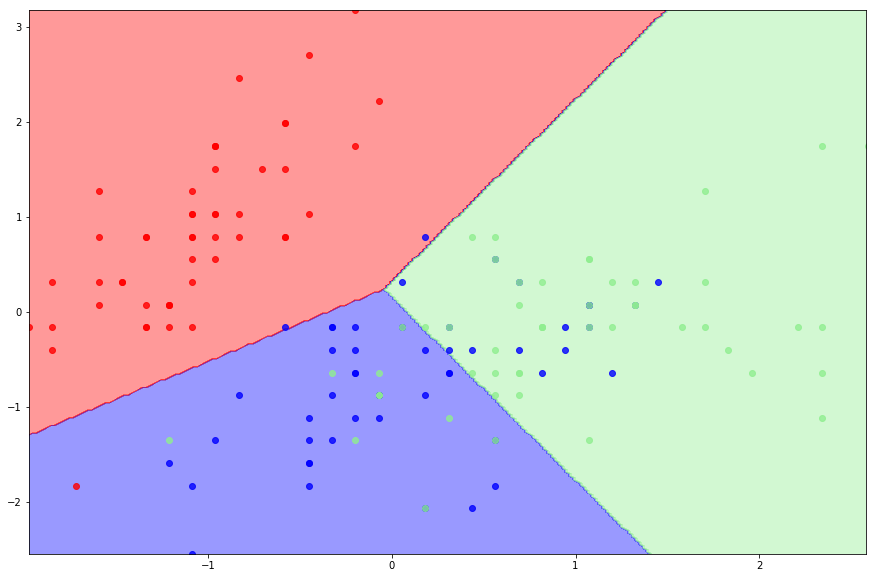

In [26]:
decision(X, y, lr, x1.std()**0.1)
plt.savefig("iris_logi.png")
plt.figure()
decision(X_std, y, lr_std, 1)
plt.savefig("iris_logi_std.png")
plt.show()